# Clasificadores 

# Cuaderno 2 - Analítica de Datos - Naive Bayes - Modelo Cuadrático

## Santiago Buitrago Osorio - 817503

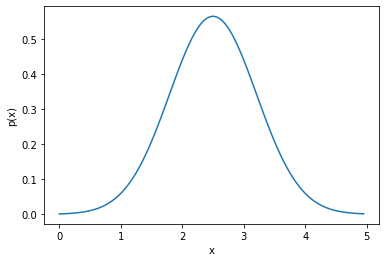

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
import numpy as np
from scipy.stats import multivariate_normal as mn
from numpy.matlib import repmat

x = np.linspace(0, 5, 100, endpoint=False)
y = mn.pdf(x, mean=2.5, cov=0.5)
plt.xlabel('x')
plt.ylabel('p(x)')

plt.plot(x, y)

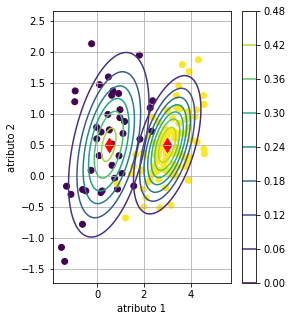

In [2]:
#clase 1 
mu1 = np.array([0.5,0.5]) #.fit -> estimar la mu1
cov1 = np.array([[0.8, 0.3],[0.3,0.6]]) #.fit -> estimar la cov1
N1 = 40 # numero puntos c1 -> estimar desde etiquetas
pdf1 = mn(mu1, cov1) # objeto scipy ara evaluar o muestrear gaussiana multivariada


#clase 2
mu2 = np.array([3,0.5]) #.fit -> estimar la mu1
cov2 = np.array([[0.5, 0.2],[0.2,0.3]]) #.fit -> estimar la cov1
N2 = 100 # numero puntos c1 -> estimar desde etiquetas
pdf2 = mn(mu2, cov2) # objeto scipy ara evaluar o muestrear gaussiana multivariada

X = np.r_[pdf1.rvs(size=N1),pdf2.rvs(size=N2)] # muestrear de las dos pdfs los datos (NO hacer esto-los datos X los ingresa el usuario)
y = np.r_[-1.0*np.ones((N1,1)),np.ones((N2,1))] #etiquetas, -1 y +1 para el problema binario

#myclass_cBayes().fit(Xtrain,ytrain), Xtrain Ntrain x P,  ytrain Ntrain

xx, yy = np.mgrid[1.25*min(X[:,0]):1.25*max(X[:,0]):.01, 1.25*min(X[:,1]):1.25*max(X[:,1]):.01] #graficar pdf en espacio de caract. 2D
pos = np.empty(xx.shape + (2,))
pos[:, :, 0] = xx; pos[:, :, 1] = yy

plt.figure(figsize=(4,5))
plt.scatter(X[:,0],X[:,1], c=y)
plt.scatter(mu1[0],mu1[1], c='r', marker='d',s = 100)
plt.scatter(mu2[0],mu2[1], c='r', marker='d',s = 100)
plt.contour(xx, yy, pdf1.pdf(pos))
plt.contour(xx, yy, pdf2.pdf(pos))
plt.colorbar()
plt.grid()
plt.xlabel('atributo 1')
plt.ylabel('atributo 2')
plt.show()


In [3]:
x.shape + (2,)

(100, 2)

$$\Sigma_c = \begin{bmatrix} \sigma^{c,2}_1 & cov^c(1,2) & \cdots & cov^c(1,P)\\
cov^c(2,1) & \sigma^{c,2}_2 & \cdots & cov^c(2,P)\\
\vdots   & \vdots & \ddots & \vdots \\
cov^c(P,1) & cov^c(P,2) & \cdots & \sigma^{c,2}_P
\end{bmatrix}$$

In [4]:
pdf1.pdf(mu1)

0.25485187206258914

In [5]:
#mu1 = np.array([0.2,0.5])
#cov1 = np.array([[0.5, 0.3],[-0.3,0.2]])
#N1 = 100
#rv1 = mn(mu1, cov1)

In [6]:
#rv1.rvs(size=100)

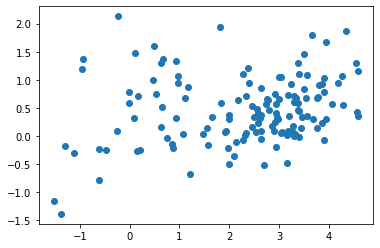

In [7]:
ye = np.c_[pdf1.pdf(X),pdf2.pdf(X)] #transform -> evaluar pdf despues de encontrar mu_c y Cov_c

plt.scatter(X[:,0],X[:,1])#,c=ye.argmax(axis=1))

(765, 440, 2)


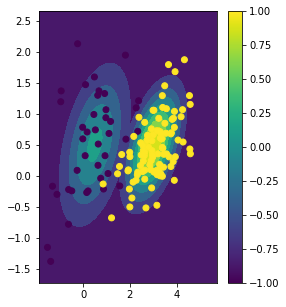

In [8]:
# predict
dc1 = pdf1.pdf(pos) # pdf1.pdf(Xtest)
dc2 = pdf2.pdf(pos) # pdf2.pdf(Xtest)
pb = np.zeros((dc1.shape[0],dc2.shape[1],2))
pb[:,:,0] = dc1 #* (N1/X.shape[0]) #marginal cada clase
pb[:,:,1] = dc2 #* (N2/X.shape[0])
#ytest_e = pb.argmax(axis=2) # etiquetas estimadas

print(pb.shape)
plt.figure(figsize=(4,5))
plt.contourf(xx, yy,pb.max(axis=2))
plt.scatter(X[:,0],X[:,1], c=y)
plt.colorbar()

In [9]:
pb.shape

(765, 440, 2)

# Clases

In [10]:
clases = np.unique(y)
clases

array([-1.,  1.])

# Número de Clases

In [11]:
dc = len(clases)
dc

2

In [12]:
prior = np.zeros((dc))
means = np.zeros((dc,X.shape[1]))
varss = np.zeros((dc,X.shape[1]))
i = 0
for c in clases:
  prior[i] = sum(y==c)/len(y)
  means[i] = X[(y==c).reshape(-1)].mean(axis=0)
  varss[i] = X[(y==c).reshape(-1)].var(axis=0)
  i+=1

In [13]:
print("Prior =",prior)

Prior = [0.28571429 0.71428571]


In [14]:
print("Medias =",means)

Medias = [[0.40790363 0.52380016]
 [3.05839663 0.43578981]]


In [15]:
print("Varianzas =",varss)

Varianzas = [[1.00247723 0.63248899]
 [0.5710426  0.23372607]]


In [16]:
Xnew = X[0]

for r in range(0,2):
  for p in range(0,2):
    y_pos = mn.pdf(Xnew, mean=means[r,p], cov=varss[r,p])*prior[r]
    print("Probabilidad en la posición:", r, ",", p, "y caracteristica", r,"=",y_pos)
    print("")
    if y_pos[0] > y_pos[1]:
      print("El mayor valor para la posición", r,",",p, "con caracteristica",r,"fue",y_pos[0])
      print("")
    else:
      print("El mayor valor fue para la posición", r,",",p, "y con caracteristica",r,"fue",y_pos[1])
      print("")

Probabilidad en la posición: 0 , 0 y caracteristica 0 = [0.01647228 0.0825433 ]

El mayor valor fue para la posición 0 , 0 y con caracteristica 0 fue 0.08254329522762476

Probabilidad en la posición: 0 , 1 y caracteristica 0 = [0.00949968 0.09869534]

El mayor valor fue para la posición 0 , 1 y con caracteristica 0 fue 0.09869534462761814

Probabilidad en la posición: 1 , 0 y caracteristica 1 = [0.25101213 0.01898092]

El mayor valor para la posición 1 , 0 con caracteristica 1 fue 0.25101213407337314

Probabilidad en la posición: 1 , 1 y caracteristica 1 = [0.00018655 0.16309797]

El mayor valor fue para la posición 1 , 1 y con caracteristica 1 fue 0.1630979746528297



$$Y_{New} = arg[max] \prod_{j=1}^{p} p(x_j/Ac)p(Ac)$$

# Cuadratico 

In [17]:
muA = np.mean(X[(y==1).reshape(-1)],axis=0)
muB = np.mean(X[(y==-1).reshape(-1)],axis=0)
CovA = np.cov(X[(y==1).reshape(-1)].T)
CovB = np.cov(X[(y==-1).reshape(-1)].T)
ICovA = np.linalg.inv(CovA)
ICovB = np.linalg.inv(CovB)
pA = sum(y==1)/len(y)
pB = sum(y==-1)/len(y)
print(muA, muB)
print(CovA, CovB)

xnew = X[10]

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import mahalanobis

print(mahalanobis(xnew, muA, ICovA))
print(mahalanobis(xnew, muB, ICovB))
cte = -0.5*np.log(np.linalg.det(CovA)) + 0.5*np.log(np.linalg.det(CovB))-np.log(pB/pA)
Rx = -0.5*mahalanobis(xnew, muA, ICovA)+ 0.5*mahalanobis(xnew, muB, ICovB) + cte
print(Rx)

[3.05839663 0.43578981] [0.40790363 0.52380016]
[[0.57681071 0.19754771]
 [0.19754771 0.23608694]] [[1.02818177 0.35833441]
 [0.35833441 0.64870665]]
4.7652070398204796
0.7132158525886141
[-0.2533727]


$$R(x) = - \dfrac{1}{2} (x-\mu_A)^T \sum_{A}^{-1}(x-\mu_A) + \dfrac{1}{2}(x-\mu_B)^T \sum_{B}^{-1}(x-\mu_B) - \dfrac{1}{2}log(|\Sigma_A|) + \dfrac{1}{2} log(|\Sigma_B|) - log\left(\dfrac{p(B)}{p(A)}\right)$$